# Critical temperature of superconductors
It is necessary to determine the critical temperature of superconductors

## Imports and reading data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Считываем тренировочные данные
train = pd.read_csv("data/train.csv")
formula_train = pd.read_csv("data/formula_train.csv")

print(f"Train dataset shape: {train.shape}")
print(f"Train_formula dataset shape: {formula_train.shape}")

Train dataset shape: (17010, 82)
Train_formula dataset shape: (17010, 88)


In [3]:
# Считываем тестовые данные
test = pd.read_csv("data/test.csv")
formula_test = pd.read_csv("data/formula_test.csv")

print(f"Test dataset shape: {test.shape}")
print(f"Test_formula dataset shape: {formula_test.shape}")

Test dataset shape: (4253, 81)
Test_formula dataset shape: (4253, 87)


## First look at data

In [4]:
# Взглянем на наши тренировочные данные
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
formula_train.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


Let's take a look at the correlation among all the features

CPU times: total: 3 s
Wall time: 2.99 s


<Axes: >

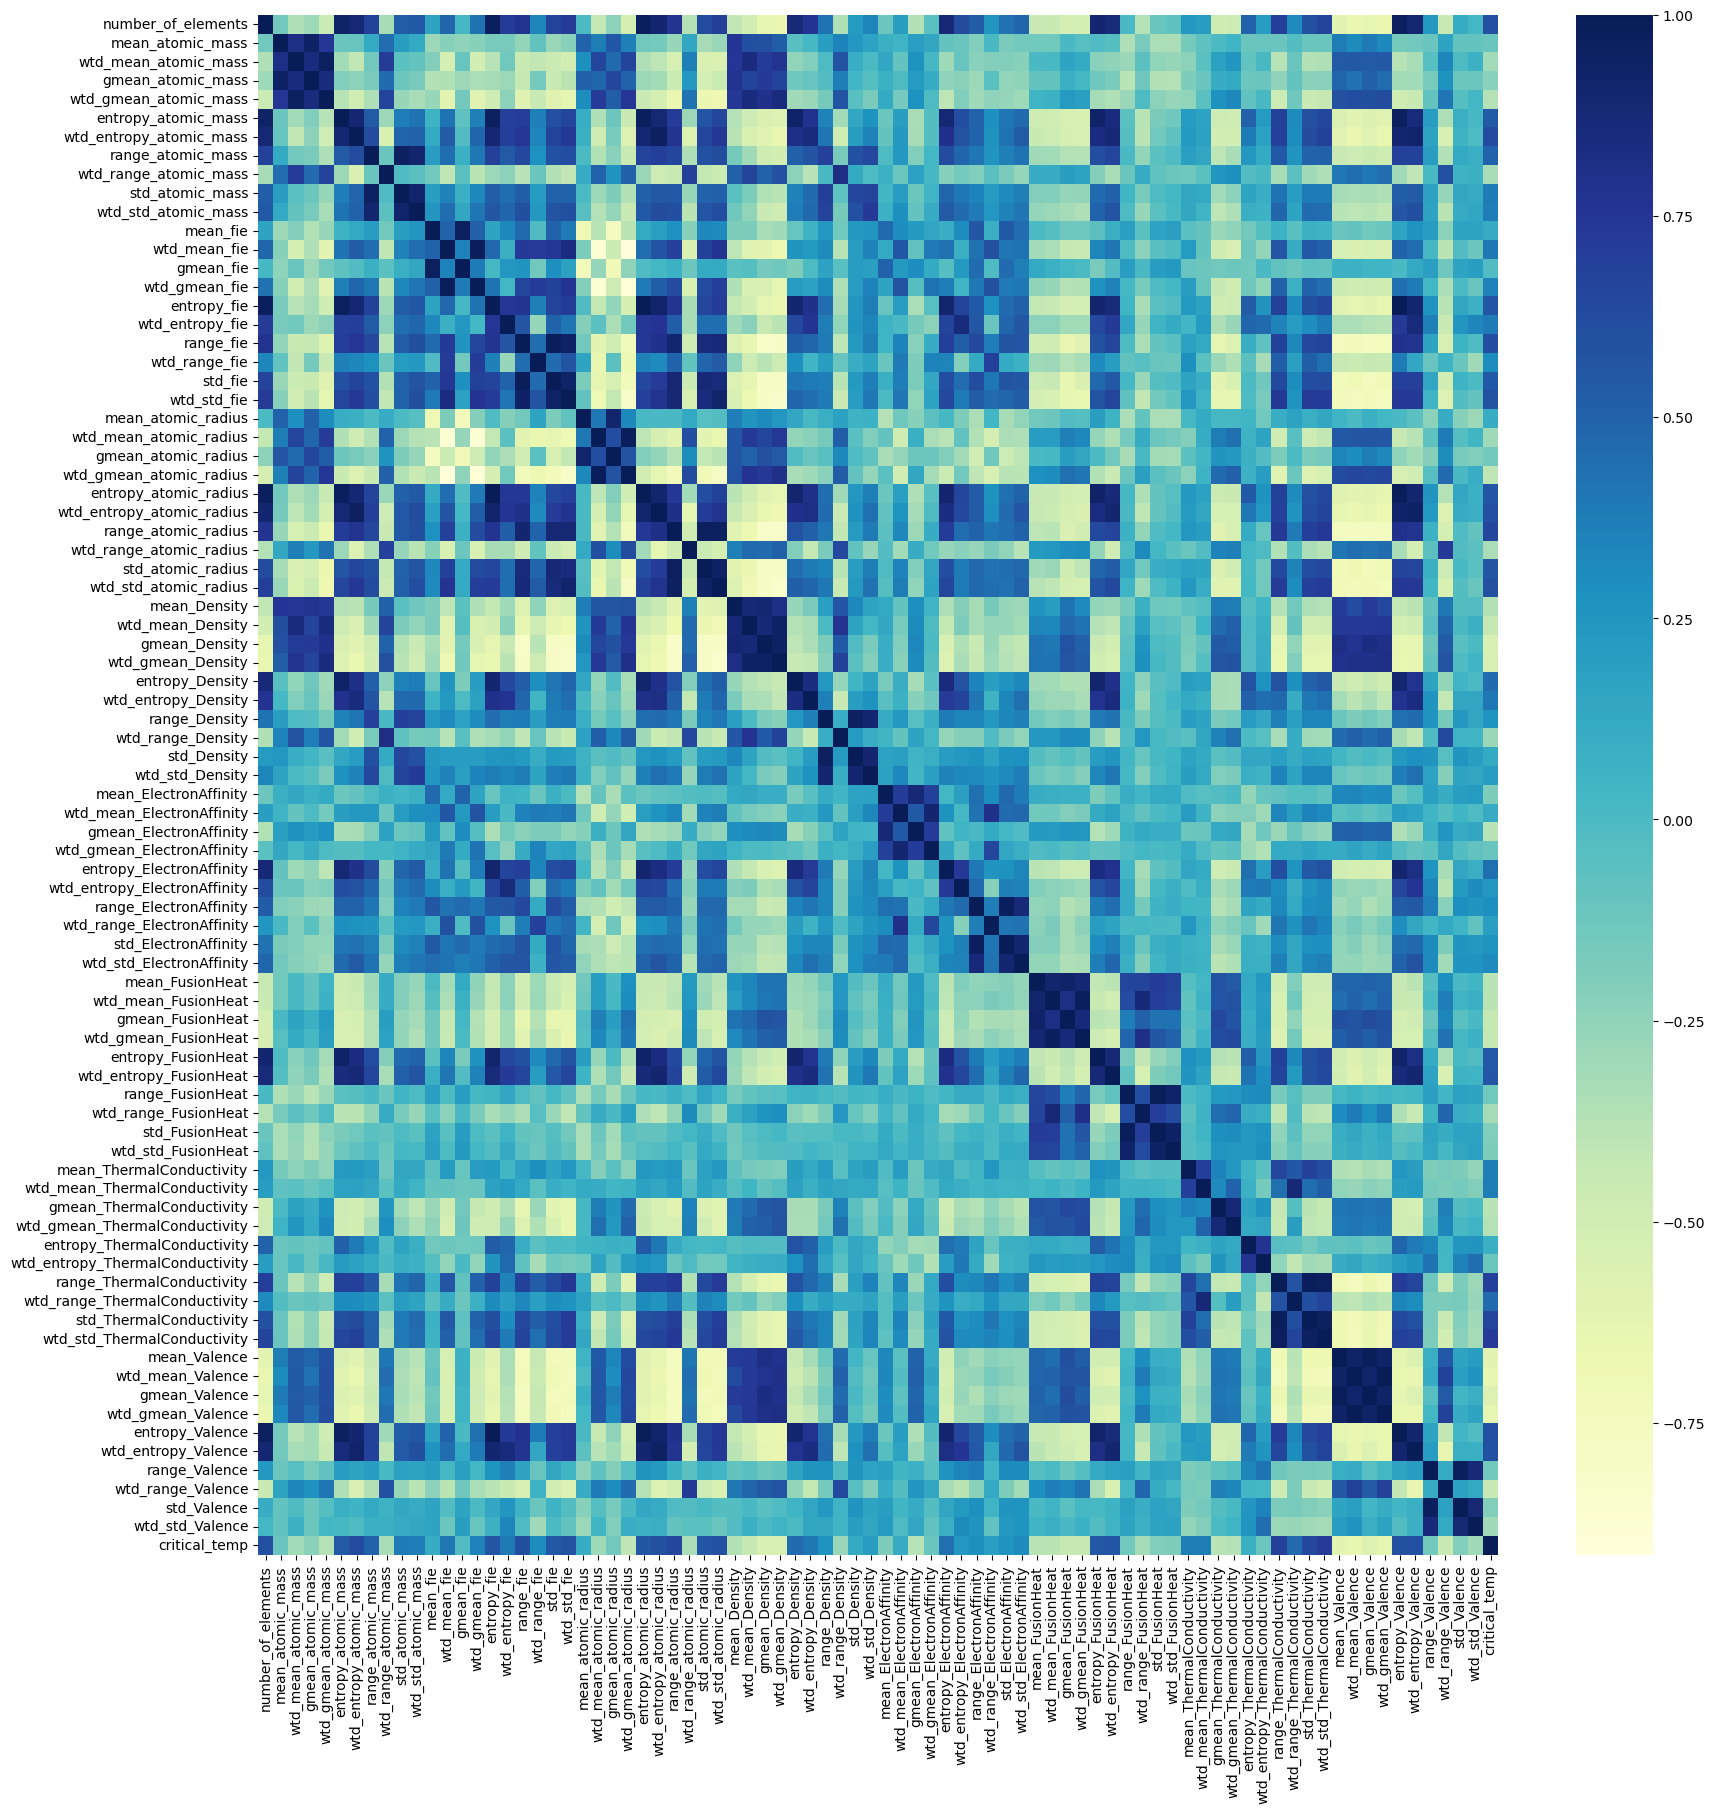

In [11]:
%%time
plt.figure(figsize=(20, 20))

sns.heatmap(train.corr(), cmap='YlGnBu')

# Data preprocessing

### Train data

let's merge training datasets for the convenience of working with them

In [12]:
formula_train.drop(columns=['critical_temp'], inplace=True)
train_full = pd.concat([train, formula_train], axis=1)

print(f"Full Train dataset shape: {train_full.shape}")

Full Train dataset shape: (17010, 169)


In [13]:
train_full.drop(columns=['material'], inplace=True)

Now we create the matrix of features and the vector of answers

In [14]:
X = train_full.drop(columns=['critical_temp'])
y = train_full['critical_temp']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (17010, 167)
Target shape: (17010,)


### Test data

Now let's do the same things with test datasets

In [15]:
test_full = pd.concat([test, formula_test], axis=1)

print(f"Full Test dataset shape: {test_full.shape}")

Full Test dataset shape: (4253, 168)


In [16]:
test_full.drop(columns=['material'], inplace=True)

## Data scaling

In [17]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X)
X_std.shape

(17010, 167)

# Model training

### Basic training

Let's `train_test_split` our data on train and validate datasets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [19]:
# model
model = LinearRegression()

In [20]:
# Now we fit our model on train data
# On this step the algorithm calculates the weights of the features and builds a linear regression equation
model.fit(X_train, y_train)

LinearRegression()

Now we can score our model

The solution is evaluated using the mean squared error (MSE) metric.

In [13]:
# prediction
y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

Mean Squared Error: 280.1071280056203
r2_score: 0.7538253028800115


### Optimisation

Now it's worth optimizing the model!

we will remove the features that almost do not contribute to the regression equation

to do this, create a dataframe of features and their coefficients

In [21]:
coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])  
coeff_df['features'] = X.columns

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
24,-69.132841,wtd_gmean_atomic_radius
2,-42.903309,wtd_mean_atomic_mass
76,-28.959595,wtd_entropy_Valence
52,-26.502317,wtd_mean_FusionHeat
11,-22.455903,mean_fie
...,...,...
49,24.181175,std_ElectronAffinity
4,26.773330,wtd_gmean_atomic_mass
75,28.445997,entropy_Valence
1,28.826868,mean_atomic_mass


Let's delete features that almost do not contribute to the regression equation

In [22]:
bad_features = coeff_df[(coeff_df['Coefficient'] > -0.7) & (coeff_df['Coefficient'] < 0.7)]
bad_features

,Coefficient,features
10,0.643249,wtd_std_atomic_mass
34,-0.116620,wtd_gmean_Density
36,0.341407,wtd_entropy_Density
66,-0.080616,wtd_entropy_ThermalConductivity
81,0.028871,H
...,...,...
159,-0.654056,Au
162,0.372102,Pb
164,0.000000,Po
165,0.000000,At


In [23]:
X_new = X.drop(columns=bad_features['features'])
X_new.shape

(17010, 98)

In [24]:
# let's do the same with the new dataset
std = StandardScaler()
X_std = std.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=123)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

Mean Squared Error: 275.7797203419203
r2_score: 0.7598717840992022


the metric has a little bit improved

# Predicting the answers for test data

So let's try to use this model, we need to drop useless features from test dataset

In [25]:
test_full.drop(columns=bad_features['features'], inplace=True)
test_full.shape

(4253, 98)

In [26]:
y_test_std = std.transform(test_full)

In [27]:
y_pred_test = model.predict(y_test_std)

In [28]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['critical_temp'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv('solution.csv', index=False)

In [29]:
y_pred_test.shape

(4253, 2)

## Elimination of multicollinearity

Let's have a look at heatmap and find pair of features which have high absolute correlation

<Axes: >

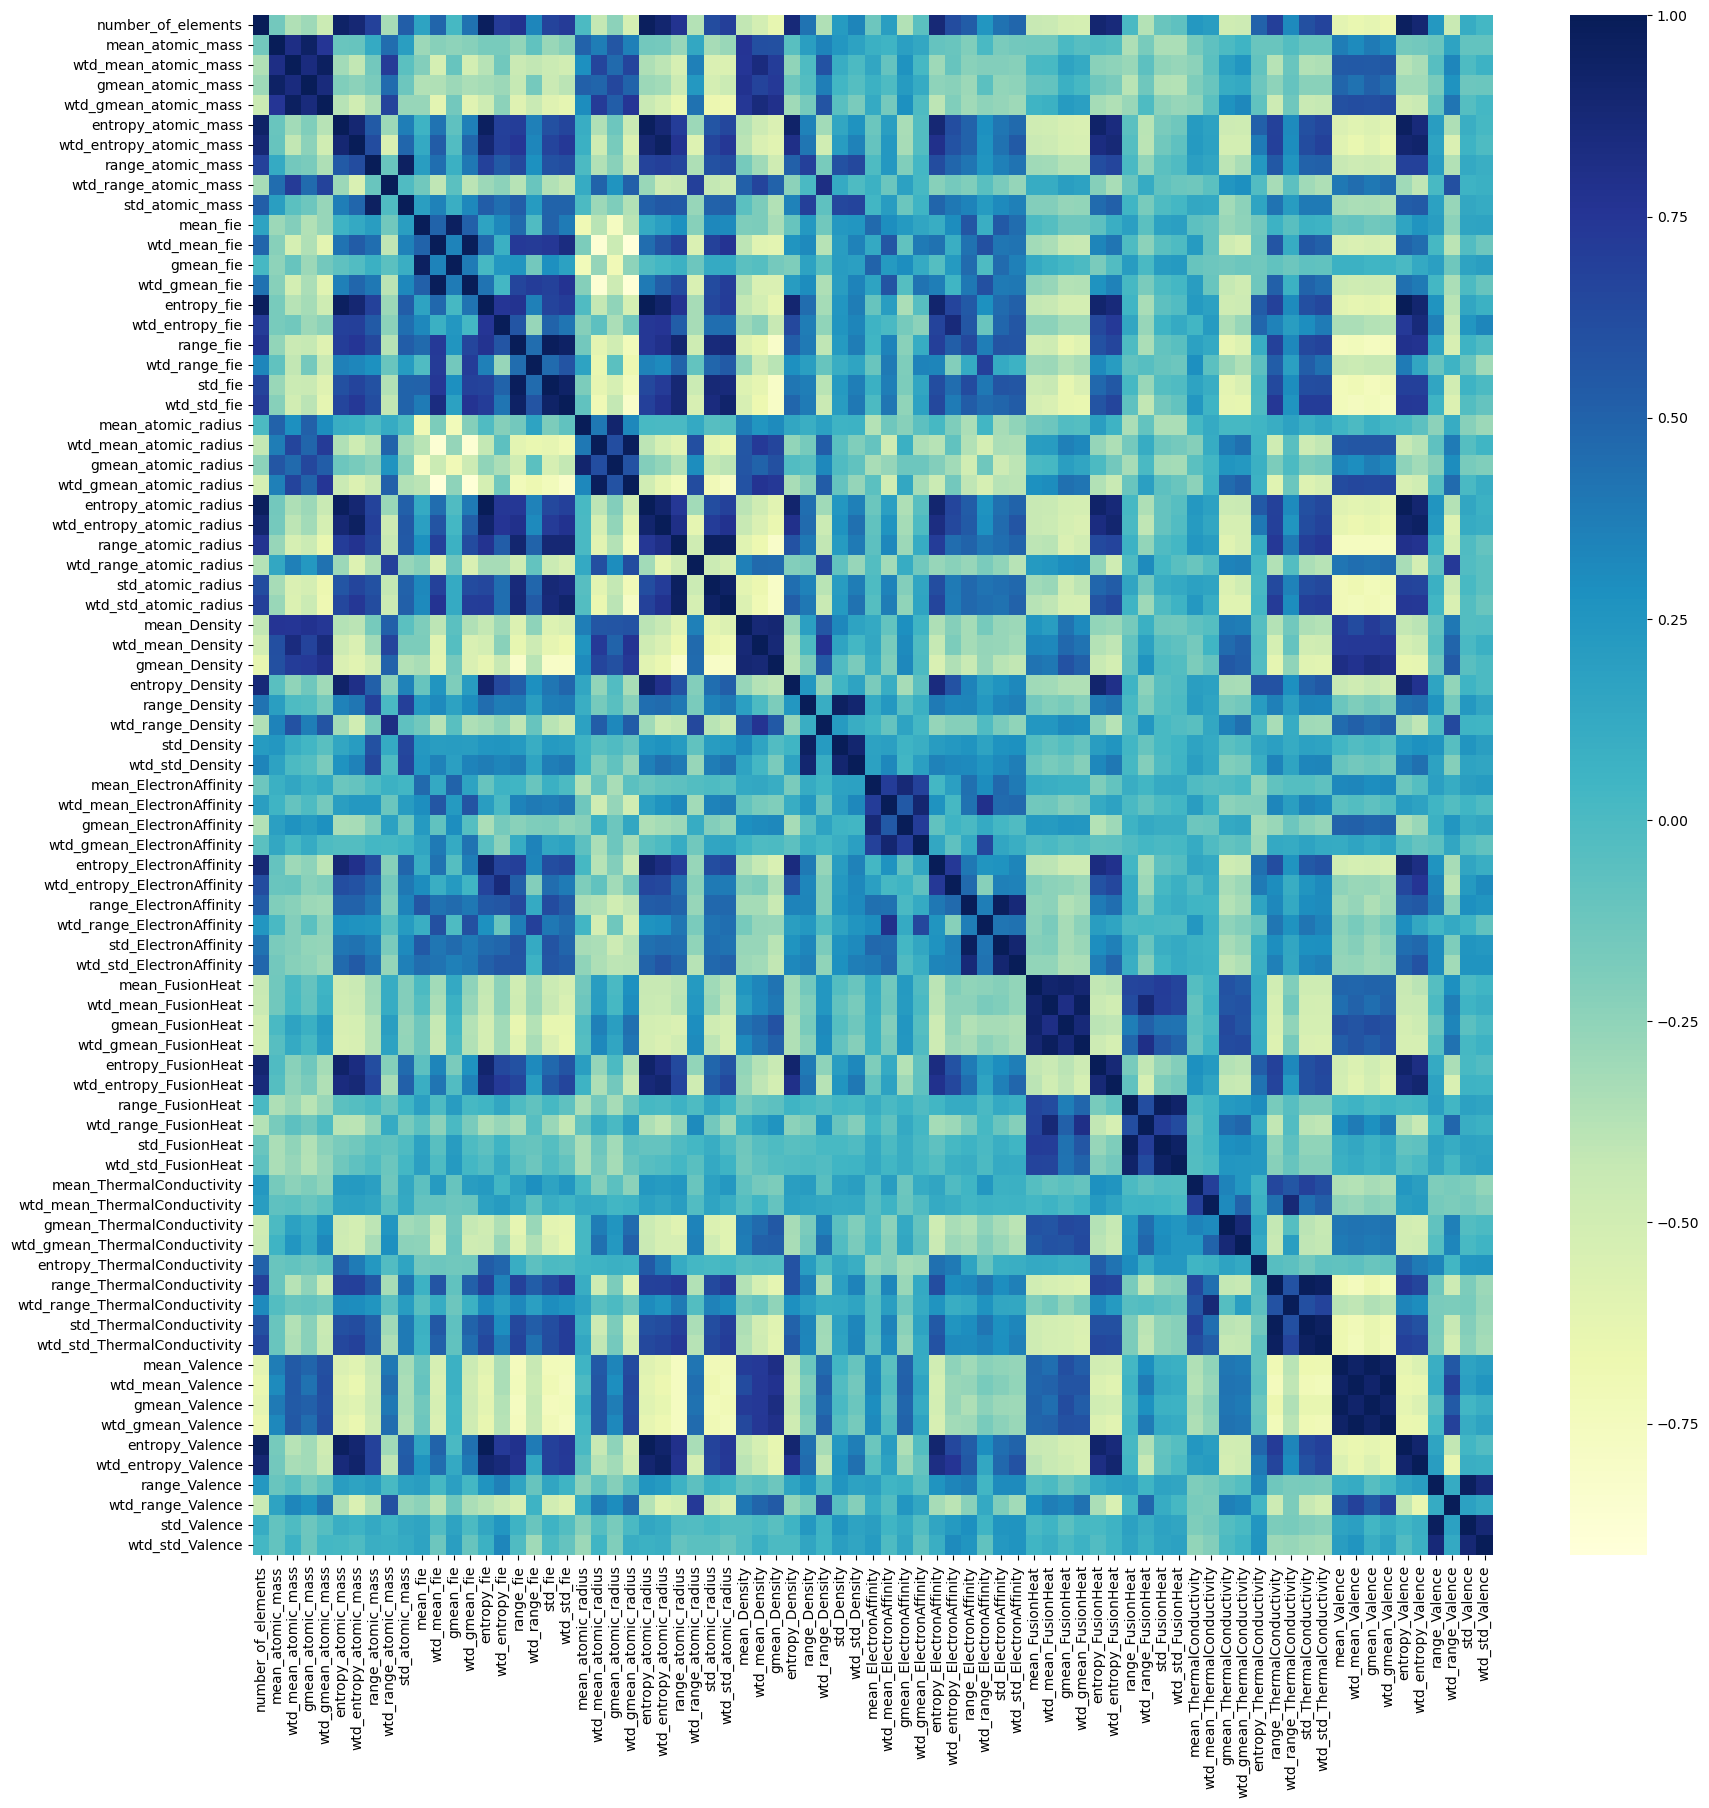

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_new.corr().loc[:'wtd_std_Valence', :'wtd_std_Valence'], cmap='YlGnBu')

In [34]:
X_cutted = X_new.corr().loc[:'wtd_std_Valence', :'wtd_std_Valence']
X_cutted

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
number_of_elements,1.000000,-0.147017,-0.359589,-0.297780,-0.460153,0.939359,0.882156,0.684415,-0.324029,0.517613,...,-0.609596,-0.649388,-0.618967,-0.659891,0.967576,0.892262,0.231164,-0.447768,0.105460,0.034338
mean_atomic_mass,-0.147017,1.000000,0.817031,0.941275,0.748241,-0.109166,-0.102214,0.123012,0.449137,0.193848,...,0.375368,0.305933,0.393948,0.323063,-0.162141,-0.150428,-0.112696,0.169954,-0.085375,-0.086496
wtd_mean_atomic_mass,-0.359589,0.817031,1.000000,0.848527,0.965004,-0.315194,-0.417680,-0.145627,0.719892,-0.061539,...,0.536714,0.548349,0.542553,0.552250,-0.382019,-0.337233,-0.044543,0.334569,-0.008228,0.072300
gmean_atomic_mass,-0.297780,0.941275,0.848527,1.000000,0.856949,-0.196480,-0.236936,-0.175981,0.461018,-0.121441,...,0.488770,0.429338,0.513234,0.451608,-0.311973,-0.312237,-0.166547,0.272641,-0.125843,-0.118270
wtd_gmean_atomic_mass,-0.460153,0.748241,0.965004,0.856949,1.000000,-0.377961,-0.489958,-0.350984,0.677883,-0.272322,...,0.601662,0.616752,0.610739,0.625893,-0.483679,-0.453666,-0.080852,0.412354,-0.034829,0.029219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wtd_entropy_Valence,0.892262,-0.150428,-0.337233,-0.312237,-0.453666,0.861558,0.918932,0.683620,-0.412153,0.543045,...,-0.560365,-0.637439,-0.565376,-0.649898,0.910828,1.000000,0.204988,-0.638472,0.091373,0.082610
range_Valence,0.231164,-0.112696,-0.044543,-0.166547,-0.080852,0.206018,0.164362,0.202487,0.017335,0.184772,...,0.088104,0.112318,-0.039391,0.034608,0.155569,0.204988,1.000000,0.113782,0.974065,0.867584
wtd_range_Valence,-0.447768,0.169954,0.334569,0.272641,0.412354,-0.349407,-0.547512,-0.363179,0.599073,-0.271548,...,0.557822,0.685912,0.536564,0.683824,-0.416349,-0.638472,0.113782,1.000000,0.184110,0.131388
std_Valence,0.105460,-0.085375,-0.008228,-0.125843,-0.034829,0.091595,0.060174,0.128327,0.060813,0.135942,...,0.166047,0.187535,0.036740,0.110260,0.035722,0.091373,0.974065,0.184110,1.000000,0.886085


<Axes: >

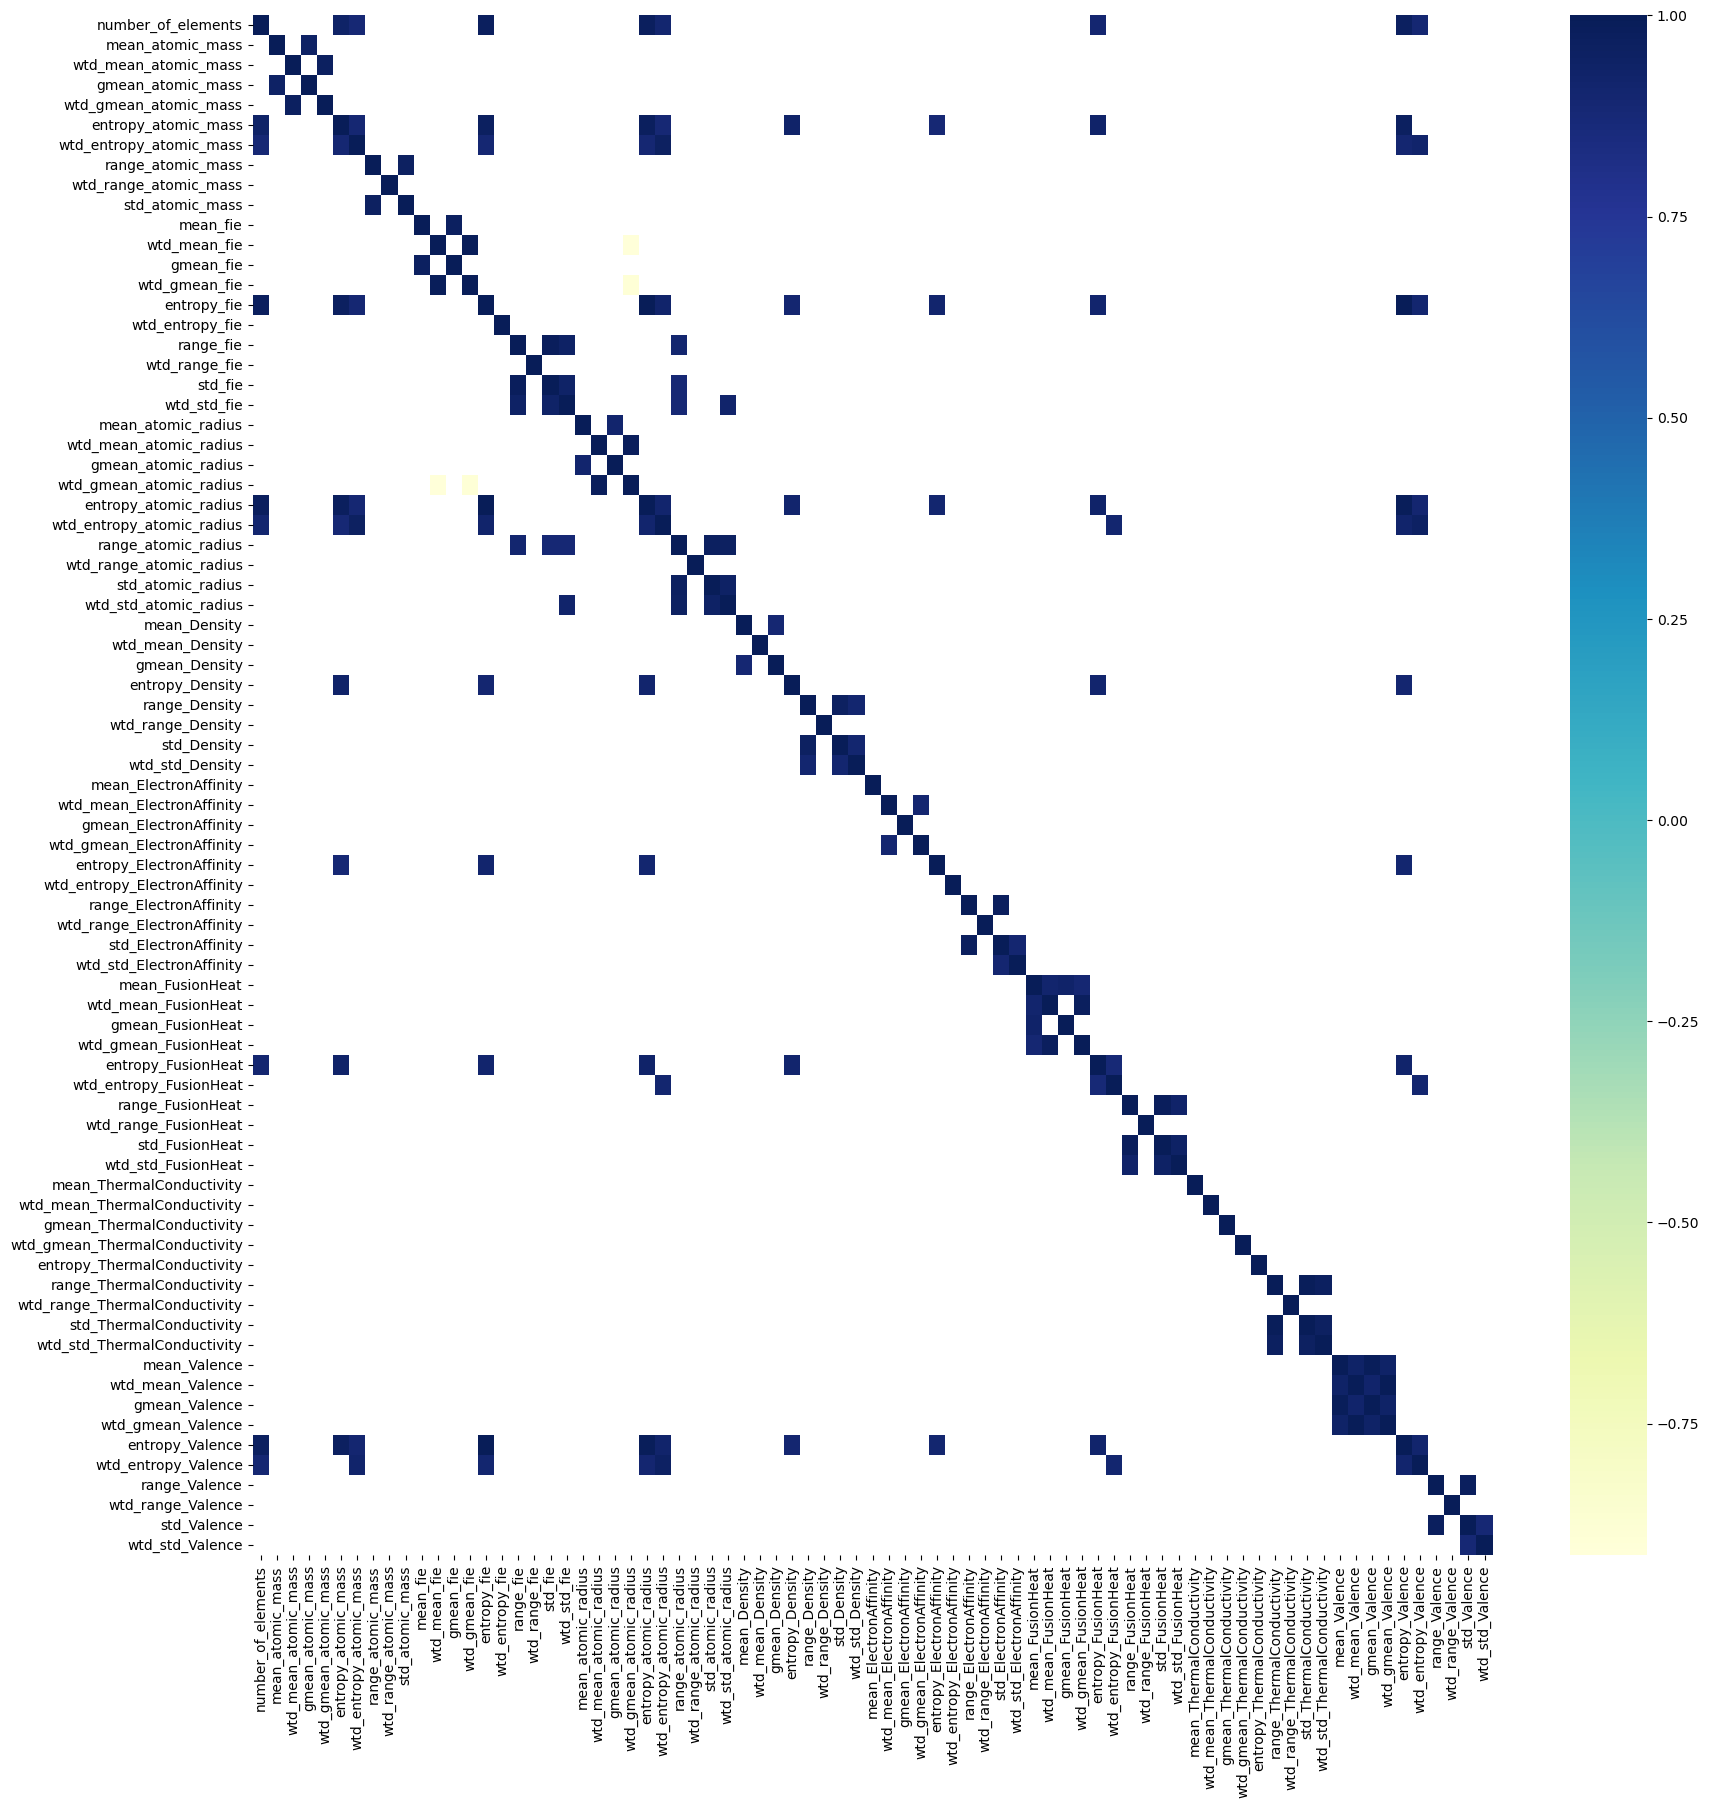

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_cutted[(X_cutted > 0.88) | (X_cutted < -0.88)], cmap='YlGnBu')

In [37]:
coeff_df.sort_values(by='Coefficient')

,Coefficient,features
24,-69.132841,wtd_gmean_atomic_radius
2,-42.903309,wtd_mean_atomic_mass
76,-28.959595,wtd_entropy_Valence
52,-26.502317,wtd_mean_FusionHeat
11,-22.455903,mean_fie
...,...,...
49,24.181175,std_ElectronAffinity
4,26.773330,wtd_gmean_atomic_mass
75,28.445997,entropy_Valence
1,28.826868,mean_atomic_mass


We need try to drop this features and look at new MSE score

In [38]:
X_cutted.drop(columns=['wtd_mean_fie', 'wtd_gmean_fie'], inplace=True)
X_cutted.drop(index=['wtd_mean_fie', 'wtd_gmean_fie'], inplace=True)

In [39]:
X_cutted.drop(columns=['wtd_entropy_FusionHeat', 'entropy_fie', 'entropy_atomic_radius',
                      'range_FusionHeat', 'range_ThermalConductivity', 'gmean_Valence',
                      'wtd_gmean_Valence'], inplace=True)
X_cutted.drop(index=['wtd_entropy_FusionHeat', 'entropy_fie', 'entropy_atomic_radius',
                      'range_FusionHeat', 'range_ThermalConductivity', 'gmean_Valence',
                      'wtd_gmean_Valence'], inplace=True)

In [40]:
X_cutted.drop(columns=['gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'wtd_entropy_atomic_mass',
                      'range_atomic_mass', 'gmean_fie', 'range_fie', 'wtd_std_fie', 'wtd_gmean_atomic_radius'], inplace=True)
X_cutted.drop(index=['gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'wtd_entropy_atomic_mass',
                      'range_atomic_mass', 'gmean_fie', 'range_fie', 'wtd_std_fie', 'wtd_gmean_atomic_radius'], inplace=True)

In [41]:
X_cutted.drop(columns=['range_atomic_radius', 'wtd_std_atomic_radius',
                      'range_Density', 'range_ElectronAffinity', 'wtd_gmean_FusionHeat',
                      'wtd_std_FusionHeat', 'wtd_std_ThermalConductivity', 'wtd_mean_Valence',
                      'range_Valence'], inplace=True)
X_cutted.drop(index=['range_atomic_radius', 'wtd_std_atomic_radius',
                      'range_Density', 'range_ElectronAffinity', 'wtd_gmean_FusionHeat',
                      'wtd_std_FusionHeat', 'wtd_std_ThermalConductivity', 'wtd_mean_Valence',
                      'range_Valence'], inplace=True)

In [42]:
X_cutted_2 = X_cutted.drop(columns=['entropy_atomic_mass', 'number_of_elements'], index=['entropy_atomic_mass', 'number_of_elements'])

In [43]:
X_mul_new = X_new.drop(columns=['wtd_mean_fie', 'wtd_gmean_fie', 'wtd_entropy_FusionHeat',
                                'entropy_fie', 'entropy_atomic_radius', 'range_FusionHeat',
                                'range_ThermalConductivity', 'gmean_Valence', 'wtd_gmean_Valence',
                                'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'wtd_entropy_atomic_mass',
                                'range_atomic_mass', 'gmean_fie', 'range_fie', 'wtd_std_fie',
                                'wtd_gmean_atomic_radius', 'range_atomic_radius', 'wtd_std_atomic_radius',
                                'range_Density', 'range_ElectronAffinity', 'wtd_gmean_FusionHeat',
                                'wtd_std_FusionHeat', 'wtd_std_ThermalConductivity', 'wtd_mean_Valence',
                                'range_Valence'])

In [44]:
X_mul_new_2 = X_mul_new.drop(columns=['entropy_atomic_mass', 'number_of_elements'])

In [45]:
# First model
std = StandardScaler()
X_std = std.fit_transform(X_mul_new)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=123)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

Mean Squared Error: 289.7395002947611
r2_score: 0.7477166588046835


In [46]:
# Second model
std = StandardScaler()
X_std = std.fit_transform(X_mul_new_2)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=123)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

Mean Squared Error: 291.04022173886756
r2_score: 0.7465840885077453


MSE score is got worse!

This means that the we need to fit model on data with all features